## Dataset Overview

100%|██████████| 317M/317M [00:05<00:00, 66.3MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/ihelon/football-player-segmentation/versions/1

Dataset structure:
1/
  annotations/
    instances_default.json
  images/
    47.jpg
    258.jpg
    506.jpg
    28.jpg
    435.jpg
    ... and 507 more files
Initializing Football Segmentation Dataset...

Loading annotations from: /root/.cache/kagglehub/datasets/ihelon/football-player-segmentation/versions/1/annotations/instances_default.json

DATASET INFORMATION
Total images: 512
Total annotations: 7686
Number of categories: 1

Categories (what we're detecting/segmenting):
  ID 1: person

Sample image information:
  Image ID: 1
  Filename: 0.jpg
  Dimensions: 1920 x 1080

Sample annotation structure:
  Annotation ID: 1
  Image ID: 1
  Category ID: 1
  Area: 2888.0
  Bounding box: [1603.3, 579.9, 58.8, 124.0]
  Has segmentation: Yes

Showing 2 random samples from the dataset:

Processing 16 annotations for image 450


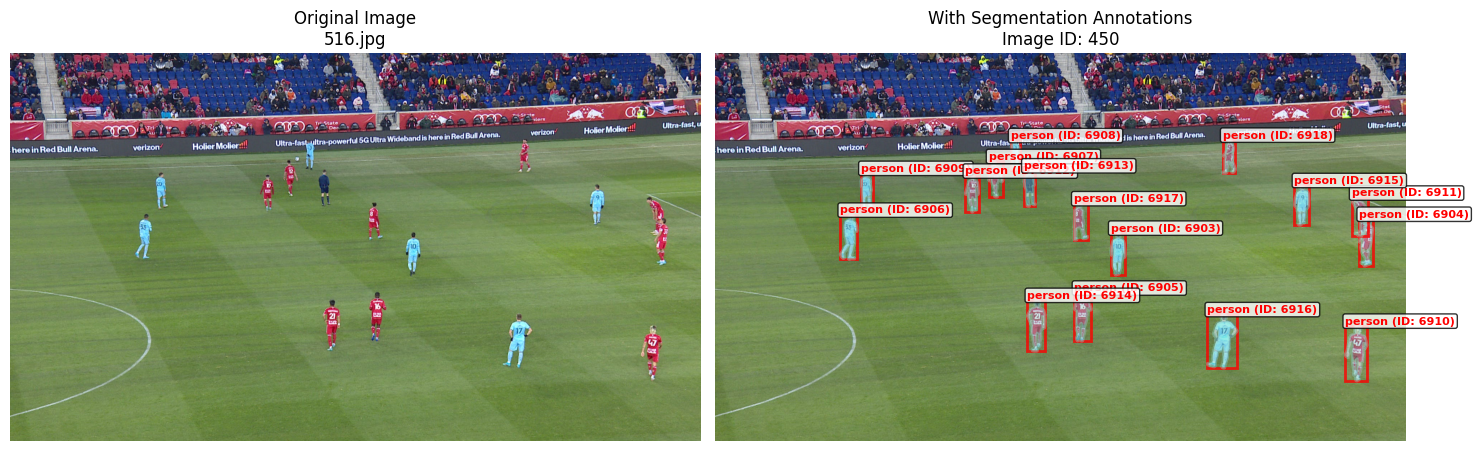


Detailed annotation breakdown:
  • person: Area=2791 pixels, Bbox=[1100,501,40,117]
  • person: Area=2697 pixels, Bbox=[1791,462,38,131]
  • person: Area=3328 pixels, Bbox=[999,667,47,135]
  • person: Area=2921 pixels, Bbox=[347,451,47,124]
  • person: Area=1835 pixels, Bbox=[760,301,41,100]
  • person: Area=1337 pixels, Bbox=[821,243,26,83]
  • person: Area=2080 pixels, Bbox=[405,334,35,102]
  • person: Area=4309 pixels, Bbox=[1752,759,61,153]
  • person: Area=2212 pixels, Bbox=[1770,403,47,107]
  • person: Area=1908 pixels, Bbox=[695,342,37,101]
  • person: Area=1695 pixels, Bbox=[858,327,32,100]
  • person: Area=3732 pixels, Bbox=[868,688,50,142]
  • person: Area=2733 pixels, Bbox=[1611,368,40,111]
  • person: Area=4980 pixels, Bbox=[1368,727,83,150]
  • person: Area=1944 pixels, Bbox=[997,419,39,102]
  • person: Area=1623 pixels, Bbox=[1411,242,36,93]

Processing 17 annotations for image 55


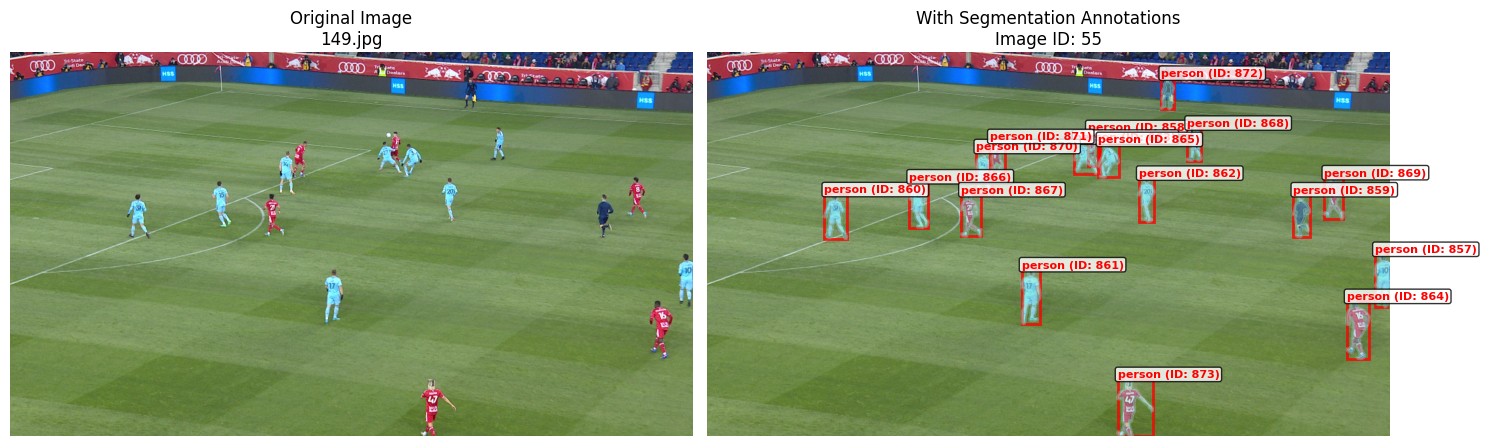


Detailed annotation breakdown:
  • person: Area=4100 pixels, Bbox=[1879,567,41,149]
  • person: Area=1414 pixels, Bbox=[1071,225,32,95]
  • person: Area=2554 pixels, Bbox=[1649,400,47,120]
  • person: Area=3239 pixels, Bbox=[329,399,63,125]
  • person: Area=4642 pixels, Bbox=[884,611,53,153]
  • person: Area=2397 pixels, Bbox=[1214,353,44,124]
  • person: Area=2107 pixels, Bbox=[1033,252,70,90]
  • person: Area=4990 pixels, Bbox=[1799,700,65,163]
  • person: Area=2301 pixels, Bbox=[1101,258,57,94]
  • person: Area=3259 pixels, Bbox=[568,363,54,130]
  • person: Area=2655 pixels, Bbox=[714,400,57,118]
  • person: Area=1595 pixels, Bbox=[1350,212,40,92]
  • person: Area=2594 pixels, Bbox=[1736,352,54,118]
  • person: Area=2951 pixels, Bbox=[757,278,44,122]
  • person: Area=1989 pixels, Bbox=[795,250,42,102]
  • person: Area=1369 pixels, Bbox=[1278,72,35,88]
  • person: Area=5088 pixels, Bbox=[1154,920,99,160]

Visualizing specific image (ID: 1):

Processing 17 annotations for image 1


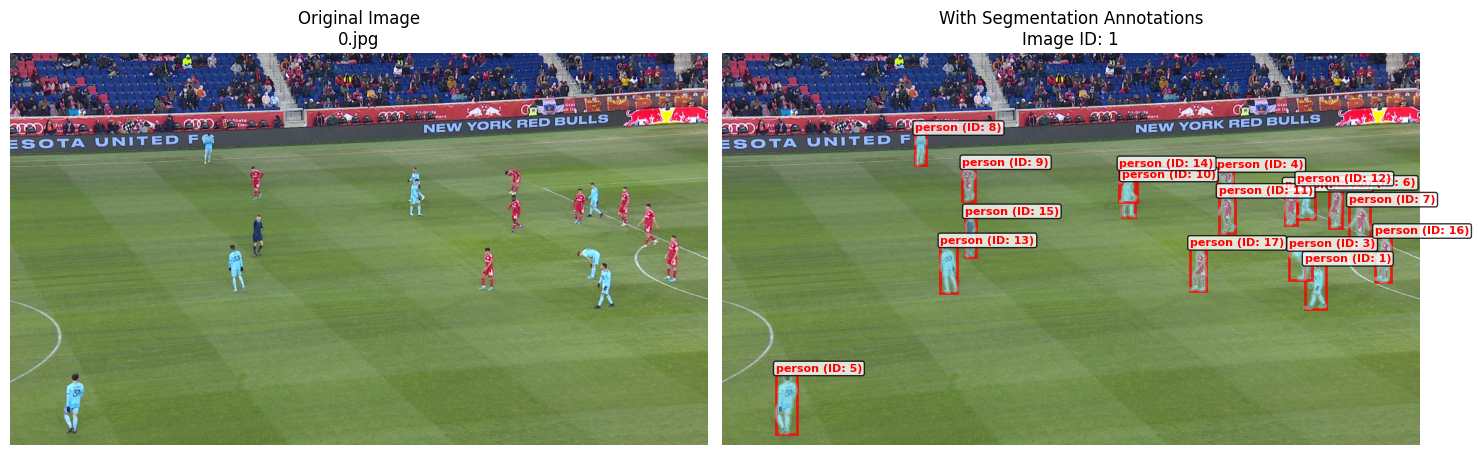


Detailed annotation breakdown:
  • person: Area=2888 pixels, Bbox=[1603,580,59,124]
  • person: Area=2094 pixels, Bbox=[1548,376,35,98]
  • person: Area=2361 pixels, Bbox=[1560,539,64,85]
  • person: Area=1703 pixels, Bbox=[1362,322,45,72]
  • person: Area=5362 pixels, Bbox=[147,882,57,167]
  • person: Area=2134 pixels, Bbox=[1671,371,35,110]
  • person: Area=2765 pixels, Bbox=[1725,417,60,122]
  • person: Area=1502 pixels, Bbox=[531,220,31,89]
  • person: Area=1774 pixels, Bbox=[661,314,36,93]
  • person: Area=1965 pixels, Bbox=[1100,348,37,103]
  • person: Area=2112 pixels, Bbox=[1366,393,46,104]
  • person: Area=1851 pixels, Bbox=[1583,359,49,98]
  • person: Area=3274 pixels, Bbox=[600,529,47,131]
  • person: Area=1909 pixels, Bbox=[1094,317,48,94]
  • person: Area=2074 pixels, Bbox=[668,449,30,112]
  • person: Area=3174 pixels, Bbox=[1797,504,44,128]
  • person: Area=2649 pixels, Bbox=[1288,536,44,119]

Creating segmentation mask for image ID: 1


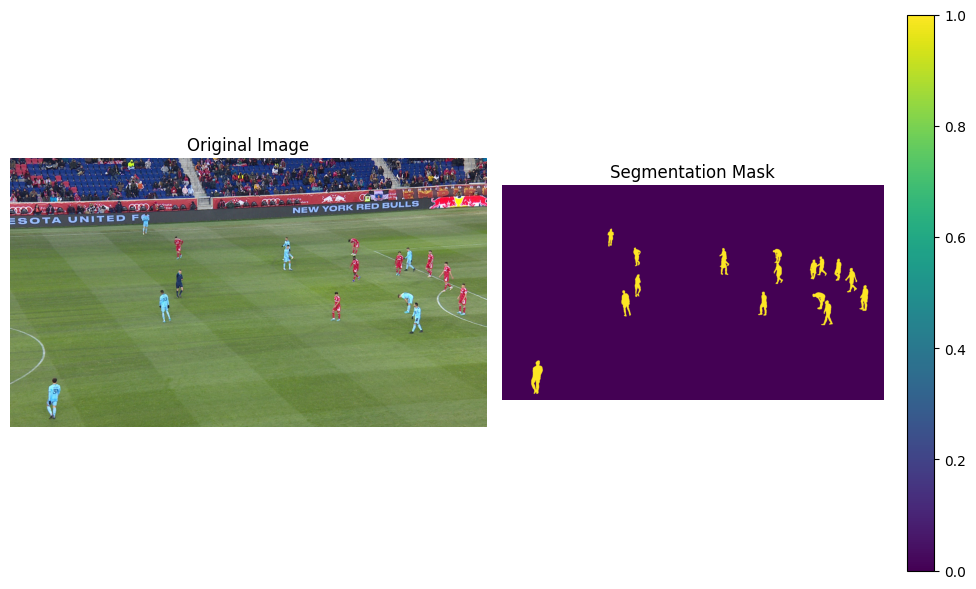

Mask shape: (1080, 1920)
Unique values in mask: [0 1]


In [1]:
import kagglehub
import json
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Polygon
import numpy as np
from PIL import Image
import cv2

# Download the dataset
path = kagglehub.dataset_download("ihelon/football-player-segmentation")
print("Path to dataset files:", path)

# Let's explore the directory structure first
print("\nDataset structure:")
for root, dirs, files in os.walk(path):
    level = root.replace(path, '').count(os.sep)
    indent = ' ' * 2 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 2 * (level + 1)
    for file in files[:5]:  # Show first 5 files in each directory
        print(f"{subindent}{file}")
    if len(files) > 5:
        print(f"{subindent}... and {len(files) - 5} more files")

class FootballSegmentationDataset:
    """
    A class to handle the Football Player Segmentation dataset with COCO format annotations.
    This dataset contains images of football matches with player segmentation masks.
    """

    def __init__(self, dataset_path):
        self.dataset_path = dataset_path
        self.images_path = os.path.join(dataset_path, "images")
        self.annotations_path = os.path.join(dataset_path, "annotations")

        # Load the COCO format annotation file
        self.annotation_file = self._find_annotation_file()
        self.coco_data = self._load_annotations()

        # Create lookup dictionaries for faster access
        self.images_dict = {img['id']: img for img in self.coco_data['images']}
        self.categories_dict = {cat['id']: cat for cat in self.coco_data['categories']}

        # Group annotations by image_id for easier processing
        self.annotations_by_image = {}
        for ann in self.coco_data['annotations']:
            image_id = ann['image_id']
            if image_id not in self.annotations_by_image:
                self.annotations_by_image[image_id] = []
            self.annotations_by_image[image_id].append(ann)

    def _find_annotation_file(self):
        """Find the JSON annotation file in the annotations directory."""
        annotation_files = [f for f in os.listdir(self.annotations_path) if f.endswith('.json')]
        if not annotation_files:
            raise FileNotFoundError("No JSON annotation file found in annotations directory")
        return os.path.join(self.annotations_path, annotation_files[0])

    def _load_annotations(self):
        """Load the COCO format annotations from JSON file."""
        print(f"\nLoading annotations from: {self.annotation_file}")
        with open(self.annotation_file, 'r') as f:
            return json.load(f)

    def get_dataset_info(self):
        """Display comprehensive information about the dataset structure and content."""
        print("\n" + "="*60)
        print("DATASET INFORMATION")
        print("="*60)

        # Basic dataset statistics
        print(f"Total images: {len(self.coco_data['images'])}")
        print(f"Total annotations: {len(self.coco_data['annotations'])}")
        print(f"Number of categories: {len(self.coco_data['categories'])}")

        # Show categories (what we're segmenting)
        print(f"\nCategories (what we're detecting/segmenting):")
        for cat in self.coco_data['categories']:
            print(f"  ID {cat['id']}: {cat['name']}")

        # Show sample image information
        print(f"\nSample image information:")
        sample_img = self.coco_data['images'][0]
        print(f"  Image ID: {sample_img['id']}")
        print(f"  Filename: {sample_img['file_name']}")
        print(f"  Dimensions: {sample_img['width']} x {sample_img['height']}")

        # Show sample annotation structure
        print(f"\nSample annotation structure:")
        sample_ann = self.coco_data['annotations'][0]
        print(f"  Annotation ID: {sample_ann['id']}")
        print(f"  Image ID: {sample_ann['image_id']}")
        print(f"  Category ID: {sample_ann['category_id']}")
        print(f"  Area: {sample_ann['area']}")
        print(f"  Bounding box: {sample_ann['bbox']}")  # [x, y, width, height]
        if 'segmentation' in sample_ann:
            print(f"  Has segmentation: Yes")

        return self.coco_data

    def decode_segmentation(self, segmentation):
        """
        Convert COCO segmentation format to polygon points.
        COCO segmentation can be in two formats:
        1. Polygon: list of [x1,y1,x2,y2,...] coordinates
        2. RLE (Run Length Encoding): compressed format
        """
        if isinstance(segmentation, list):
            # Polygon format - reshape flat list into (x,y) pairs
            polygons = []
            for seg in segmentation:
                # Each seg is a flat list: [x1,y1,x2,y2,x3,y3,...]
                # Reshape to pairs: [[x1,y1], [x2,y2], [x3,y3], ...]
                poly = np.array(seg).reshape(-1, 2)
                polygons.append(poly)
            return polygons
        else:
            # RLE format - would need pycocotools to decode
            print("RLE segmentation format detected - requires pycocotools for decoding")
            return None

    def visualize_image_with_annotations(self, image_id, figsize=(15, 10)):
        """
        Display an image with its segmentation annotations overlaid.
        This is the main visualization function that shows both the original image
        and all the football player segmentations.
        """
        # Get image information
        if image_id not in self.images_dict:
            print(f"Image ID {image_id} not found in dataset")
            return

        img_info = self.images_dict[image_id]
        img_path = os.path.join(self.images_path, img_info['file_name'])

        # Load and display the image
        if not os.path.exists(img_path):
            print(f"Image file not found: {img_path}")
            return

        image = Image.open(img_path)

        # Create figure with subplots
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)

        # Show original image
        ax1.imshow(image)
        ax1.set_title(f"Original Image\n{img_info['file_name']}", fontsize=12)
        ax1.axis('off')

        # Show image with annotations
        ax2.imshow(image)
        ax2.set_title(f"With Segmentation Annotations\nImage ID: {image_id}", fontsize=12)

        # Get annotations for this image
        if image_id in self.annotations_by_image:
            annotations = self.annotations_by_image[image_id]
            print(f"\nProcessing {len(annotations)} annotations for image {image_id}")

            # Use different colors for different categories
            colors = plt.cm.Set3(np.linspace(0, 1, len(self.categories_dict)))

            for i, ann in enumerate(annotations):
                category_id = ann['category_id']
                category_name = self.categories_dict[category_id]['name']

                # Draw bounding box
                bbox = ann['bbox']  # [x, y, width, height]
                rect = patches.Rectangle(
                    (bbox[0], bbox[1]), bbox[2], bbox[3],
                    linewidth=2, edgecolor='red', facecolor='none',
                    alpha=0.8
                )
                ax2.add_patch(rect)

                # Add category label
                ax2.text(bbox[0], bbox[1]-5, f"{category_name} (ID: {ann['id']})",
                        fontsize=8, color='red', weight='bold',
                        bbox=dict(boxstyle="round,pad=0.2", facecolor='white', alpha=0.8))

                # Draw segmentation if available
                if 'segmentation' in ann:
                    polygons = self.decode_segmentation(ann['segmentation'])
                    if polygons:
                        color = colors[category_id % len(colors)]
                        for poly in polygons:
                            # Create polygon patch
                            polygon_patch = Polygon(
                                poly, closed=True,
                                alpha=0.4, facecolor=color, edgecolor=color, linewidth=2
                            )
                            ax2.add_patch(polygon_patch)
        else:
            print(f"No annotations found for image {image_id}")

        ax2.axis('off')
        plt.tight_layout()
        plt.show()

        # Print detailed annotation information
        if image_id in self.annotations_by_image:
            print(f"\nDetailed annotation breakdown:")
            for ann in self.annotations_by_image[image_id]:
                category_name = self.categories_dict[ann['category_id']]['name']
                print(f"  • {category_name}: Area={ann['area']:.0f} pixels, "
                      f"Bbox=[{ann['bbox'][0]:.0f},{ann['bbox'][1]:.0f},"
                      f"{ann['bbox'][2]:.0f},{ann['bbox'][3]:.0f}]")

    def show_random_samples(self, num_samples=3):
        """Display random samples from the dataset to get a feel for the data."""
        import random

        print(f"\nShowing {num_samples} random samples from the dataset:")
        image_ids = list(self.images_dict.keys())
        random_ids = random.sample(image_ids, min(num_samples, len(image_ids)))

        for image_id in random_ids:
            self.visualize_image_with_annotations(image_id)

    def create_segmentation_mask(self, image_id):
        """
        Create a segmentation mask from the annotations.
        This converts the polygon annotations into a binary or multi-class mask.
        """
        if image_id not in self.images_dict:
            return None

        img_info = self.images_dict[image_id]
        height, width = img_info['height'], img_info['width']

        # Create empty mask
        mask = np.zeros((height, width), dtype=np.uint8)

        if image_id in self.annotations_by_image:
            for ann in self.annotations_by_image[image_id]:
                if 'segmentation' in ann:
                    polygons = self.decode_segmentation(ann['segmentation'])
                    if polygons:
                        for poly in polygons:
                            # Convert polygon to mask
                            cv2.fillPoly(mask, [poly.astype(np.int32)], ann['category_id'])

        return mask

# Initialize the dataset
print("Initializing Football Segmentation Dataset...")
dataset = FootballSegmentationDataset(path)

# Get comprehensive information about the dataset
dataset_info = dataset.get_dataset_info()

# Show some random samples
dataset.show_random_samples(num_samples=2)

# Example: Visualize a specific image (using the first image ID)
first_image_id = list(dataset.images_dict.keys())[0]
print(f"\nVisualizing specific image (ID: {first_image_id}):")
dataset.visualize_image_with_annotations(first_image_id)

# Example: Create segmentation mask
print(f"\nCreating segmentation mask for image ID: {first_image_id}")
mask = dataset.create_segmentation_mask(first_image_id)
if mask is not None:
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    img_info = dataset.images_dict[first_image_id]
    img_path = os.path.join(dataset.images_path, img_info['file_name'])
    original_img = Image.open(img_path)
    plt.imshow(original_img)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap='viridis')
    plt.title("Segmentation Mask")
    plt.axis('off')
    plt.colorbar()
    plt.tight_layout()
    plt.show()

    print(f"Mask shape: {mask.shape}")
    print(f"Unique values in mask: {np.unique(mask)}")

## Segmentation Pipeline

Path to dataset files: /kaggle/input/football-player-segmentation
Initializing Optimized Football Segmentation System...
Sampled 50 images for processing

DEMONSTRATION: Processing a single image
Sample image ID: 96

Processing Image ID: 96
Image shape after downscaling: (270, 480, 3)

2. Evaluating different feature extraction methods...
   Starting feature evaluation...
   Sampling 5000 pixels from 129600 total pixels
   Evaluating method 1/4... Done (0.2s, Score: 0.684)
   Evaluating method 2/4... Done (0.3s, Score: 0.437)
   Evaluating method 3/4... Done (0.3s, Score: 0.663)
   Evaluating method 4/4... Done (0.2s, Score: 0.677)

   Feature Evaluation Results:
     RGB Color Features: Shape=(129600, 3), Best K=5, Silhouette Score=0.6845
     RGB + Position Features: Shape=(129600, 5), Best K=3, Silhouette Score=0.4374
     HSV Color Features: Shape=(129600, 3), Best K=5, Silhouette Score=0.6632
     RGB + Texture Features: Shape=(129600, 4), Best K=7, Silhouette Score=0.6766

   Sel

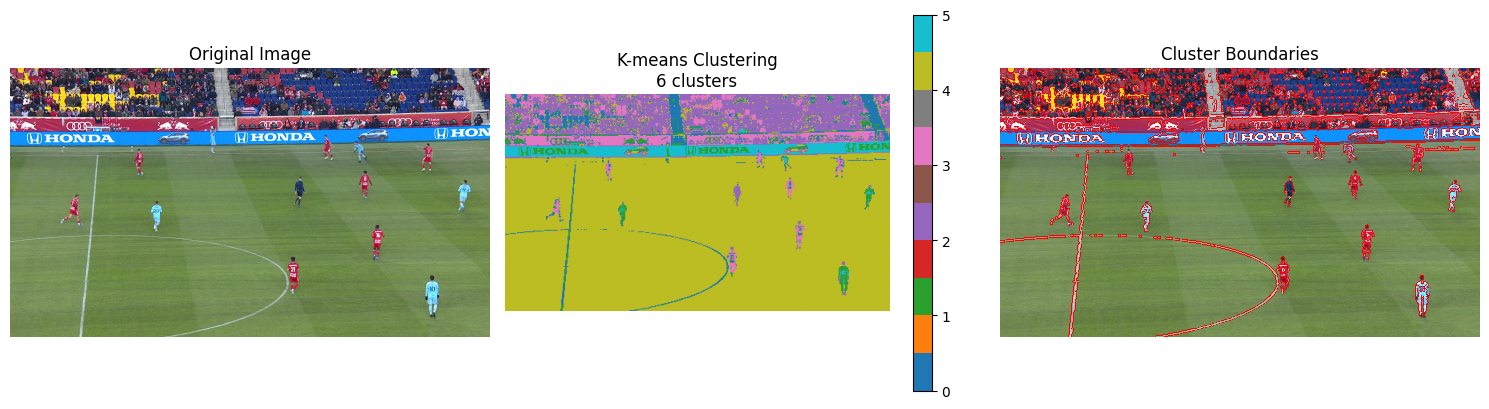


4. Filtering clusters...
   Original clusters: 6
   After filtering: 5 clusters


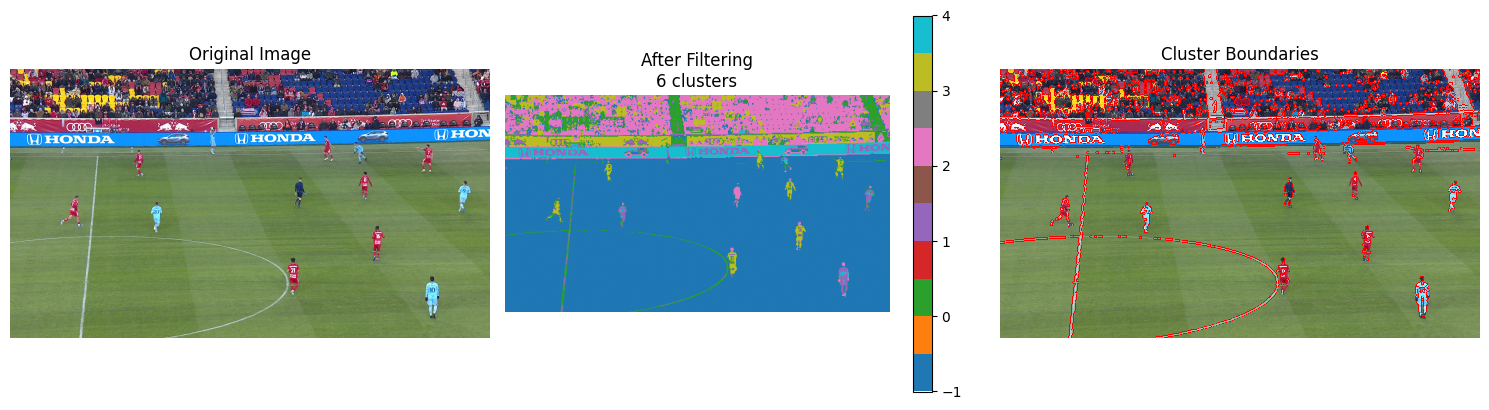


5. Creating binary mask and finding connected components...
   Applied spatial constraints (excluded fan areas)
   Found 78 connected components


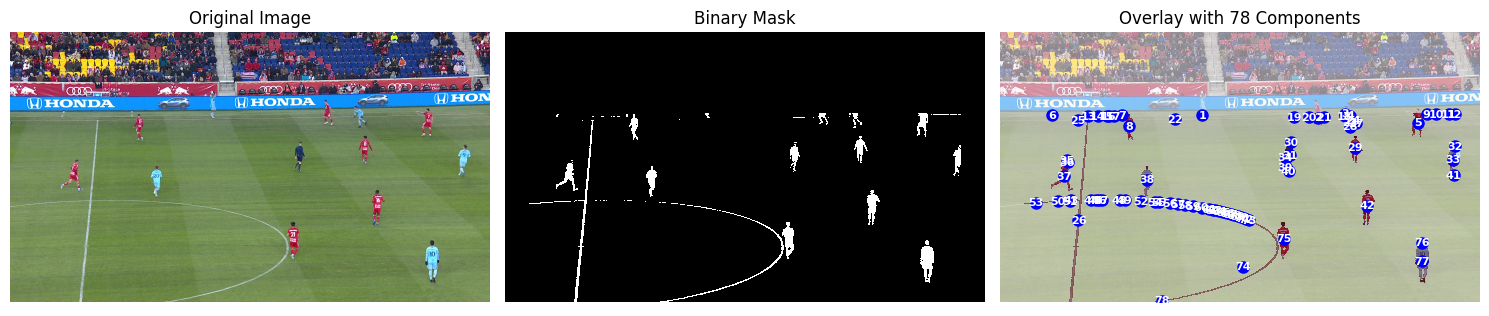


7. Evaluation...
   Dice Coefficient: 0.6754
   IoU Score: 0.5099


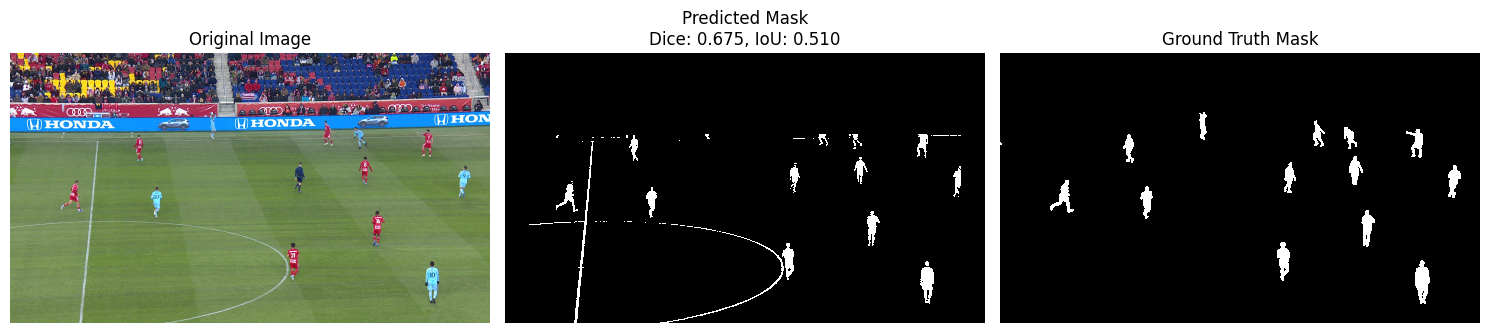


RUNNING BATCH EVALUATION

BATCH EVALUATION ON 50 IMAGES

Processing image 1/50: 96

Processing Image ID: 96
Image shape after downscaling: (270, 480, 3)

2. Evaluating different feature extraction methods...
   Starting feature evaluation...
   Sampling 5000 pixels from 129600 total pixels
   Evaluating method 1/4... Done (0.4s, Score: 0.702)
   Evaluating method 2/4... Done (0.4s, Score: 0.452)
   Evaluating method 3/4... Done (0.4s, Score: 0.660)
   Evaluating method 4/4... Done (0.3s, Score: 0.657)

   Feature Evaluation Results:
     RGB Color Features: Shape=(129600, 3), Best K=5, Silhouette Score=0.7025
     RGB + Position Features: Shape=(129600, 5), Best K=3, Silhouette Score=0.4516
     HSV Color Features: Shape=(129600, 3), Best K=5, Silhouette Score=0.6602
     RGB + Texture Features: Shape=(129600, 4), Best K=7, Silhouette Score=0.6572

   Selected feature method: RGB Color Features

3. Applying K-means clustering...
   K-means: K=5, Silhouette=0.6947

4. Filtering cluster

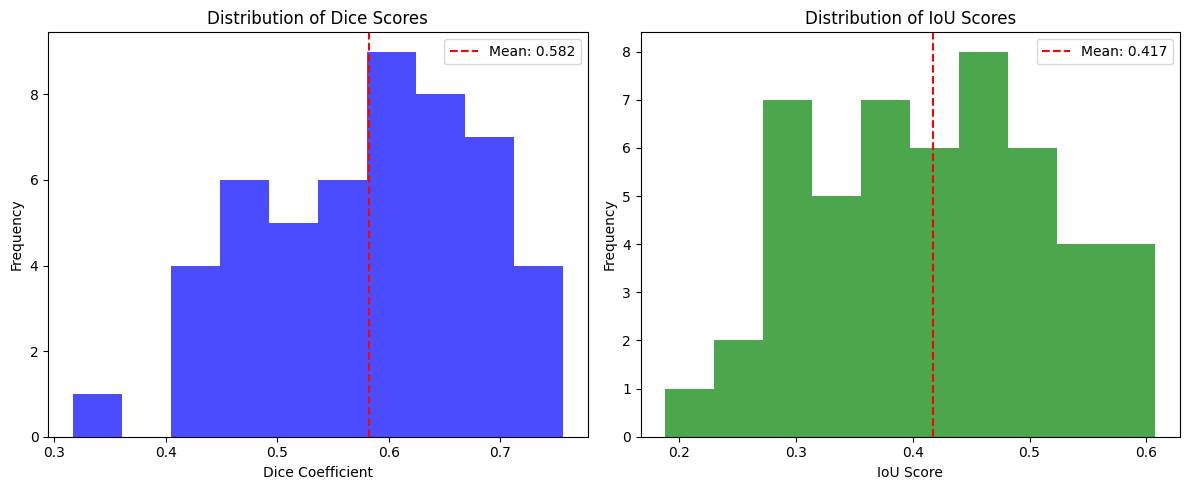

In [ ]:
import kagglehub
import json
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Polygon
import numpy as np
from PIL import Image
import cv2
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from scipy.ndimage import label, center_of_mass
import random
from collections import Counter
import warnings
import time
warnings.filterwarnings('ignore')

# Download the dataset
path = kagglehub.dataset_download("ihelon/football-player-segmentation")
print("Path to dataset files:", path)

class FootballSegmentationClustering:
    """
    Optimized implementation of football player segmentation using clustering methods
    """

    def __init__(self, dataset_path, sample_size=50, scale_factor=4):  # Increased scale factor
        self.dataset_path = dataset_path
        self.sample_size = sample_size
        self.scale_factor = scale_factor  # More aggressive downscaling
        self.images_path = os.path.join(dataset_path, "images")
        self.annotations_path = os.path.join(dataset_path, "annotations")

        # Load the dataset
        self.annotation_file = self._find_annotation_file()
        self.coco_data = self._load_annotations()
        self.images_dict = {img['id']: img for img in self.coco_data['images']}
        self.categories_dict = {cat['id']: cat for cat in self.coco_data['categories']}

        # Group annotations by image_id
        self.annotations_by_image = {}
        for ann in self.coco_data['annotations']:
            image_id = ann['image_id']
            if image_id not in self.annotations_by_image:
                self.annotations_by_image[image_id] = []
            self.annotations_by_image[image_id].append(ann)

        # Sample images
        self.sampled_image_ids = self._sample_images()
        print(f"Sampled {len(self.sampled_image_ids)} images for processing")

    def _find_annotation_file(self):
        """Find the JSON annotation file"""
        annotation_files = [f for f in os.listdir(self.annotations_path) if f.endswith('.json')]
        if not annotation_files:
            raise FileNotFoundError("No JSON annotation file found")
        return os.path.join(self.annotations_path, annotation_files[0])

    def _load_annotations(self):
        """Load COCO format annotations"""
        with open(self.annotation_file, 'r') as f:
            return json.load(f)

    def _sample_images(self):
        """Sample random images from the dataset"""
        all_image_ids = list(self.images_dict.keys())
        return random.sample(all_image_ids, min(self.sample_size, len(all_image_ids)))

    def load_and_preprocess_image(self, image_id):
        """Load and downscale image"""
        img_info = self.images_dict[image_id]
        img_path = os.path.join(self.images_path, img_info['file_name'])

        if not os.path.exists(img_path):
            return None, None

        # Load image
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Downscale more aggressively
        original_shape = image.shape[:2]
        new_height = max(64, original_shape[0] // self.scale_factor)  # Minimum 64 pixels
        new_width = max(64, original_shape[1] // self.scale_factor)

        downscaled_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)

        return downscaled_image, original_shape

    def create_ground_truth_mask(self, image_id, image_shape):
        """Create ground truth binary mask from annotations"""
        height, width = image_shape[:2]
        mask = np.zeros((height, width), dtype=np.uint8)

        if image_id in self.annotations_by_image:
            for ann in self.annotations_by_image[image_id]:
                if 'segmentation' in ann:
                    polygons = self._decode_segmentation(ann['segmentation'])
                    if polygons:
                        for poly in polygons:
                            # Scale polygon coordinates to match downscaled image
                            original_height, original_width = self.images_dict[image_id]['height'], self.images_dict[image_id]['width']
                            scale_y = height / original_height
                            scale_x = width / original_width

                            scaled_poly = poly.copy()
                            scaled_poly[:, 0] *= scale_x  # x coordinates
                            scaled_poly[:, 1] *= scale_y  # y coordinates

                            cv2.fillPoly(mask, [scaled_poly.astype(np.int32)], 1)

        return mask

    def _decode_segmentation(self, segmentation):
        """Convert COCO segmentation to polygon points"""
        if isinstance(segmentation, list):
            polygons = []
            for seg in segmentation:
                poly = np.array(seg).reshape(-1, 2)
                polygons.append(poly)
            return polygons
        return None

    # ===================== OPTIMIZED FEATURE CREATION =====================

    def create_color_features(self, image):
        """Method 1: Simple RGB color features"""
        features = image.reshape(-1, 3).astype(np.float32)
        return features, "RGB Color Features"

    def create_color_position_features(self, image):
        """Method 2: RGB + spatial position features"""
        height, width, channels = image.shape

        # Create position grids
        y_coords, x_coords = np.mgrid[0:height, 0:width]

        # Normalize coordinates
        y_coords = y_coords.astype(np.float32) / height
        x_coords = x_coords.astype(np.float32) / width

        # Combine RGB + position
        rgb_features = image.reshape(-1, channels).astype(np.float32)
        pos_features = np.column_stack([
            x_coords.flatten(),
            y_coords.flatten()
        ])

        # Weight spatial features less than color features
        pos_features *= 50  # Scale spatial features

        features = np.column_stack([rgb_features, pos_features])
        return features, "RGB + Position Features"

    def create_hsv_features(self, image):
        """Method 3: HSV color space features"""
        hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
        features = hsv_image.reshape(-1, 3).astype(np.float32)
        return features, "HSV Color Features"

    def create_texture_features(self, image):
        """Method 4: Simplified texture features"""
        # RGB features
        rgb_features = image.reshape(-1, 3).astype(np.float32)

        # Simple texture using Sobel gradients
        gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

        # Compute gradients
        grad_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
        grad_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
        gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)

        texture_features = gradient_magnitude.reshape(-1, 1)

        features = np.column_stack([rgb_features, texture_features])
        return features, "RGB + Texture Features"

    def quick_evaluate_features(self, image, max_pixels=5000):
        """Quick feature evaluation using sampling"""
        print("   Starting feature evaluation...")

        feature_methods = [
            self.create_color_features,
            self.create_color_position_features,
            self.create_hsv_features,
            self.create_texture_features
        ]

        results = {}
        height, width = image.shape[:2]
        total_pixels = height * width

        # Sample pixels if image is too large
        if total_pixels > max_pixels:
            indices = np.random.choice(total_pixels, max_pixels, replace=False)
            print(f"   Sampling {max_pixels} pixels from {total_pixels} total pixels")
        else:
            indices = np.arange(total_pixels)

        for i, method_func in enumerate(feature_methods):
            try:
                print(f"   Evaluating method {i+1}/4...", end=" ")
                start_time = time.time()

                features, method_name = method_func(image)

                # Sample features if needed
                if len(indices) < len(features):
                    features_sampled = features[indices]
                else:
                    features_sampled = features

                # Normalize features
                scaler = StandardScaler()
                features_normalized = scaler.fit_transform(features_sampled)

                # Quick clustering test with small K
                best_score = -1
                best_k = 3

                for k in [3, 5, 7]:
                    if len(features_normalized) > k * 10:  # Ensure enough samples per cluster
                        try:
                            kmeans = KMeans(n_clusters=k, random_state=42, n_init=5, max_iter=100)
                            labels = kmeans.fit_predict(features_normalized)

                            if len(np.unique(labels)) > 1:
                                # Use a subset for silhouette score if still too large
                                if len(features_normalized) > 1000:
                                    sample_indices = np.random.choice(len(features_normalized), 1000, replace=False)
                                    score = silhouette_score(features_normalized[sample_indices], labels[sample_indices])
                                else:
                                    score = silhouette_score(features_normalized, labels)

                                if score > best_score:
                                    best_score = score
                                    best_k = k
                        except Exception as e:
                            print(f"Error with k={k}: {e}")
                            continue

                results[method_name] = {
                    'features_shape': features.shape,
                    'best_k': best_k,
                    'best_silhouette': best_score,
                    'scaler': scaler
                }

                elapsed = time.time() - start_time
                print(f"Done ({elapsed:.1f}s, Score: {best_score:.3f})")

            except Exception as e:
                print(f"Failed: {e}")
                results[method_name] = {
                    'features_shape': (0, 0),
                    'best_k': 3,
                    'best_silhouette': -1,
                    'scaler': None
                }

        return results

    # ===================== OPTIMIZED CLUSTERING =====================

    def fast_kmeans_clustering(self, features, max_k=8):
        """Fast K-means clustering with limited K range"""
        if len(features) < 100:
            return np.zeros(len(features)), 3, 0, []

        best_k = 3
        best_score = -1
        best_labels = None

        # Limit K range for speed
        k_range = range(3, min(max_k + 1, len(features) // 50))

        for k_val in k_range:
            try:
                kmeans = KMeans(n_clusters=k_val, random_state=42, n_init=5, max_iter=100)
                labels = kmeans.fit_predict(features)

                if len(np.unique(labels)) > 1:
                    # Sample for silhouette score if dataset is large
                    if len(features) > 2000:
                        sample_indices = np.random.choice(len(features), 2000, replace=False)
                        score = silhouette_score(features[sample_indices], labels[sample_indices])
                    else:
                        score = silhouette_score(features, labels)

                    if score > best_score:
                        best_score = score
                        best_k = k_val
                        best_labels = labels
            except Exception as e:
                print(f"   K-means error with k={k_val}: {e}")
                continue

        if best_labels is None:
            best_labels = np.zeros(len(features))

        return best_labels, best_k, best_score, []

    def visualize_clusters(self, image, labels, title="Clustering Results"):
        """Visualize clustering results"""
        height, width = image.shape[:2]
        cluster_image = labels.reshape(height, width)

        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 1)
        plt.imshow(image)
        plt.title("Original Image")
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(cluster_image, cmap='tab10')
        plt.title(f"{title}\n{len(np.unique(labels))} clusters")
        plt.axis('off')
        plt.colorbar(shrink=0.8)

        plt.subplot(1, 3, 3)
        # Show cluster boundaries
        try:
            boundaries = cv2.Canny((cluster_image * 255 / cluster_image.max()).astype(np.uint8), 50, 150)
            overlay = image.copy()
            overlay[boundaries > 0] = [255, 0, 0]  # Red boundaries
            plt.imshow(overlay)
            plt.title("Cluster Boundaries")
        except:
            plt.imshow(image)
            plt.title("Original (boundary error)")
        plt.axis('off')

        plt.tight_layout()
        plt.show()

    # ===================== FILTERING AND MERGING =====================

    def filter_clusters_by_size(self, labels, image_shape, min_size_ratio=0.005, max_size_ratio=0.4):
        """Filter clusters based on size"""
        height, width = image_shape[:2]
        total_pixels = height * width

        unique_labels, counts = np.unique(labels, return_counts=True)
        valid_labels = []

        for label_id, count in zip(unique_labels, counts):
            size_ratio = count / total_pixels
            if min_size_ratio <= size_ratio <= max_size_ratio:
                valid_labels.append(label_id)

        # Create filtered mask
        filtered_labels = np.full_like(labels, -1)
        for i, valid_label in enumerate(valid_labels):
            filtered_labels[labels == valid_label] = i

        return filtered_labels, valid_labels

    def create_binary_mask(self, labels, image_shape):
        """Create binary mask from cluster labels"""
        height, width = image_shape[:2]
        binary_mask = np.zeros((height, width), dtype=np.uint8)

        unique_labels = np.unique(labels)
        valid_labels = unique_labels[unique_labels >= 0]

        for label_id in valid_labels:
            binary_mask[labels.reshape(height, width) == label_id] = 1

        return binary_mask

    def apply_spatial_constraints(self, mask, image_shape):
        """Apply football field spatial knowledge"""
        h, w = image_shape[:2]

        # Create field region mask (exclude top 30% where fans typically are)
        field_mask = np.ones((h, w), dtype=bool)
        field_mask[:int(0.3*h), :] = False  # Exclude fan areas

        # Apply side constraints (players rarely at extreme edges)
        field_mask[:, :int(0.05*w)] = False
        field_mask[:, int(0.95*w):] = False

        return mask & field_mask

    def find_connected_components(self, binary_mask):
        """Find connected components and their centroids"""
        labeled_mask, num_components = label(binary_mask)

        if num_components > 0:
            centroids = center_of_mass(binary_mask, labeled_mask, range(1, num_components + 1))
        else:
            centroids = []

        return labeled_mask, centroids

    def visualize_binary_mask_and_components(self, image, binary_mask, centroids):
        """Visualize binary mask and connected components"""
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 1)
        plt.imshow(image)
        plt.title("Original Image")
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(binary_mask, cmap='gray')
        plt.title("Binary Mask")
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(image)
        plt.imshow(binary_mask, alpha=0.5, cmap='Reds')

        # Plot centroids
        for i, centroid in enumerate(centroids):
            if len(centroid) == 2 and not (np.isnan(centroid[0]) or np.isnan(centroid[1])):
                plt.plot(centroid[1], centroid[0], 'bo', markersize=8)
                plt.text(centroid[1], centroid[0], str(i+1), color='white',
                        fontweight='bold', ha='center', va='center', fontsize=8)

        plt.title(f"Overlay with {len(centroids)} Components")
        plt.axis('off')

        plt.tight_layout()
        plt.show()

    # ===================== EVALUATION =====================

    def dice_coefficient(self, pred_mask, true_mask):
        """Calculate Dice coefficient"""
        intersection = np.logical_and(pred_mask, true_mask).sum()
        union = pred_mask.sum() + true_mask.sum()

        if union == 0:
            return 1.0  # Both masks are empty

        return 2.0 * intersection / union

    def iou_score(self, pred_mask, true_mask):
        """Calculate Intersection over Union (IoU)"""
        intersection = np.logical_and(pred_mask, true_mask).sum()
        union = np.logical_or(pred_mask, true_mask).sum()

        if union == 0:
            return 1.0  # Both masks are empty

        return intersection / union

    # ===================== MAIN PROCESSING PIPELINE =====================

    def process_single_image(self, image_id, visualize=True):
        """Complete processing pipeline for a single image"""
        print(f"\n{'='*60}")
        print(f"Processing Image ID: {image_id}")
        print(f"{'='*60}")

        # Load image
        image, original_shape = self.load_and_preprocess_image(image_id)
        if image is None:
            print(f"Could not load image {image_id}")
            return None

        print(f"Image shape after downscaling: {image.shape}")

        # Step 2: Feature creation and evaluation
        print("\n2. Evaluating different feature extraction methods...")
        feature_results = self.quick_evaluate_features(image)

        # Display feature evaluation results
        print("\n   Feature Evaluation Results:")
        for method_name, result in feature_results.items():
            print(f"     {method_name}: Shape={result['features_shape']}, "
                  f"Best K={result['best_k']}, Silhouette Score={result['best_silhouette']:.4f}")

        # Select best feature method (or default if all failed)
        valid_results = {k: v for k, v in feature_results.items() if v['best_silhouette'] > -1}

        if valid_results:
            best_method_name = max(valid_results.items(), key=lambda x: x[1]['best_silhouette'])[0]
        else:
            best_method_name = "RGB Color Features"
            print("   Warning: Using default RGB features due to evaluation issues")

        print(f"\n   Selected feature method: {best_method_name}")

        # Create features using selected method
        if best_method_name == "RGB Color Features":
            features, _ = self.create_color_features(image)
        elif best_method_name == "RGB + Position Features":
            features, _ = self.create_color_position_features(image)
        elif best_method_name == "HSV Color Features":
            features, _ = self.create_hsv_features(image)
        else:
            features, _ = self.create_texture_features(image)

        # Normalize features
        scaler = StandardScaler()
        features_normalized = scaler.fit_transform(features)

        # Step 3: Clustering
        print("\n3. Applying K-means clustering...")
        labels, best_k, score, _ = self.fast_kmeans_clustering(features_normalized)
        print(f"   K-means: K={best_k}, Silhouette={score:.4f}")

        if visualize:
            self.visualize_clusters(image, labels, "K-means Clustering")

        # Step 4: Filtering
        print("\n4. Filtering clusters...")
        filtered_labels, valid_labels = self.filter_clusters_by_size(labels, image.shape)

        print(f"   Original clusters: {len(np.unique(labels))}")
        print(f"   After filtering: {len(valid_labels)} clusters")

        if visualize and len(valid_labels) > 0:
            self.visualize_clusters(image, filtered_labels, "After Filtering")

        # Step 5: Binary mask and connected components
        print("\n5. Creating binary mask and finding connected components...")
        raw_binary_mask = self.create_binary_mask(filtered_labels, image.shape)

        # Apply spatial constraints to remove fan areas
        binary_mask = self.apply_spatial_constraints(raw_binary_mask.astype(bool), image.shape).astype(np.uint8)
        print(f"   Applied spatial constraints (excluded fan areas)")

        labeled_components, centroids = self.find_connected_components(binary_mask)
        print(f"   Found {len(centroids)} connected components")

        if visualize:
            self.visualize_binary_mask_and_components(image, binary_mask, centroids)

        # Step 7: Evaluation
        print("\n7. Evaluation...")
        ground_truth = self.create_ground_truth_mask(image_id, image.shape)

        dice = self.dice_coefficient(binary_mask, ground_truth)
        iou = self.iou_score(binary_mask, ground_truth)

        print(f"   Dice Coefficient: {dice:.4f}")
        print(f"   IoU Score: {iou:.4f}")

        if visualize:
            # Show comparison with ground truth
            plt.figure(figsize=(15, 5))

            plt.subplot(1, 3, 1)
            plt.imshow(image)
            plt.title("Original Image")
            plt.axis('off')

            plt.subplot(1, 3, 2)
            plt.imshow(binary_mask, cmap='gray')
            plt.title(f"Predicted Mask\nDice: {dice:.3f}, IoU: {iou:.3f}")
            plt.axis('off')

            plt.subplot(1, 3, 3)
            plt.imshow(ground_truth, cmap='gray')
            plt.title("Ground Truth Mask")
            plt.axis('off')

            plt.tight_layout()
            plt.show()

        return {
            'image_id': image_id,
            'binary_mask': binary_mask,
            'ground_truth': ground_truth,
            'dice': dice,
            'iou': iou,
            'centroids': centroids,
            'best_feature_method': best_method_name
        }

    def run_batch_evaluation(self, num_images=10):
        """Run evaluation on a batch of images"""
        print(f"\n{'='*60}")
        print(f"BATCH EVALUATION ON {num_images} IMAGES")
        print(f"{'='*60}")

        results = []

        for i in range(min(num_images, len(self.sampled_image_ids))):
            image_id = self.sampled_image_ids[i]
            print(f"\nProcessing image {i+1}/{num_images}: {image_id}")

            try:
                result = self.process_single_image(image_id, visualize=False)
                if result is not None:
                    results.append(result)
                    print(f"   ✓ Success - Dice: {result['dice']:.3f}, IoU: {result['iou']:.3f}")
                else:
                    print(f"   ✗ Failed to process image")
            except Exception as e:
                print(f"   ✗ Error: {e}")
                continue

        if results:
            dice_scores = [r['dice'] for r in results]
            iou_scores = [r['iou'] for r in results]

            print(f"\n{'='*60}")
            print(f"FINAL EVALUATION RESULTS")
            print(f"{'='*60}")
            print(f"Successfully processed: {len(results)}/{num_images} images")
            print(f"Mean Dice Coefficient: {np.mean(dice_scores):.4f} ± {np.std(dice_scores):.4f}")
            print(f"Mean IoU Score: {np.mean(iou_scores):.4f} ± {np.std(iou_scores):.4f}")
            print(f"Best Dice Score: {np.max(dice_scores):.4f}")
            print(f"Best IoU Score: {np.max(iou_scores):.4f}")

            # Plot results distribution
            plt.figure(figsize=(12, 5))

            plt.subplot(1, 2, 1)
            plt.hist(dice_scores, bins=min(10, len(dice_scores)), alpha=0.7, color='blue')
            plt.axvline(np.mean(dice_scores), color='red', linestyle='--',
                       label=f'Mean: {np.mean(dice_scores):.3f}')
            plt.xlabel('Dice Coefficient')
            plt.ylabel('Frequency')
            plt.title('Distribution of Dice Scores')
            plt.legend()

            plt.subplot(1, 2, 2)
            plt.hist(iou_scores, bins=min(10, len(iou_scores)), alpha=0.7, color='green')
            plt.axvline(np.mean(iou_scores), color='red', linestyle='--',
                       label=f'Mean: {np.mean(iou_scores):.3f}')
            plt.xlabel('IoU Score')
            plt.ylabel('Frequency')
            plt.title('Distribution of IoU Scores')
            plt.legend()

            plt.tight_layout()
            plt.show()

        return results

# Initialize the segmentation system with aggressive downscaling
print("Initializing Optimized Football Segmentation System...")
segmentation_system = FootballSegmentationClustering(path, sample_size=50, scale_factor=4)

# Process a single image with full visualization
print("\n" + "="*60)
print("DEMONSTRATION: Processing a single image")
print("="*60)

sample_image_id = segmentation_system.sampled_image_ids[0]
print(f"Sample image ID: {sample_image_id}")

single_result = segmentation_system.process_single_image(sample_image_id, visualize=True)

# Run batch evaluation
print(f"\n{'='*60}")
print("RUNNING BATCH EVALUATION")
print("="*60)
batch_results = segmentation_system.run_batch_evaluation(num_images=50)

## Bonus

Initializing Football Segmentation Dataset...

Loading annotations from: /root/.cache/kagglehub/datasets/ihelon/football-player-segmentation/versions/1/annotations/instances_default.json
Using device: cpu


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/85.6M [00:00<?, ?B/s]

Loaded model: hrnet_w18
Original Image Size: (1920, 1080)
Feature Map Shape: (64, 112, 112)
Scaling feature vectors...
Running DBSCAN with eps=2.5 and min_samples=250...
DBSCAN finished. Found clusters: [-1  0]


/tmp/ipython-input-2970548503.py:247: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  axes[2].imshow(cluster_map + 1, cmap=plt.cm.get_cmap('viridis', unique_clusters))


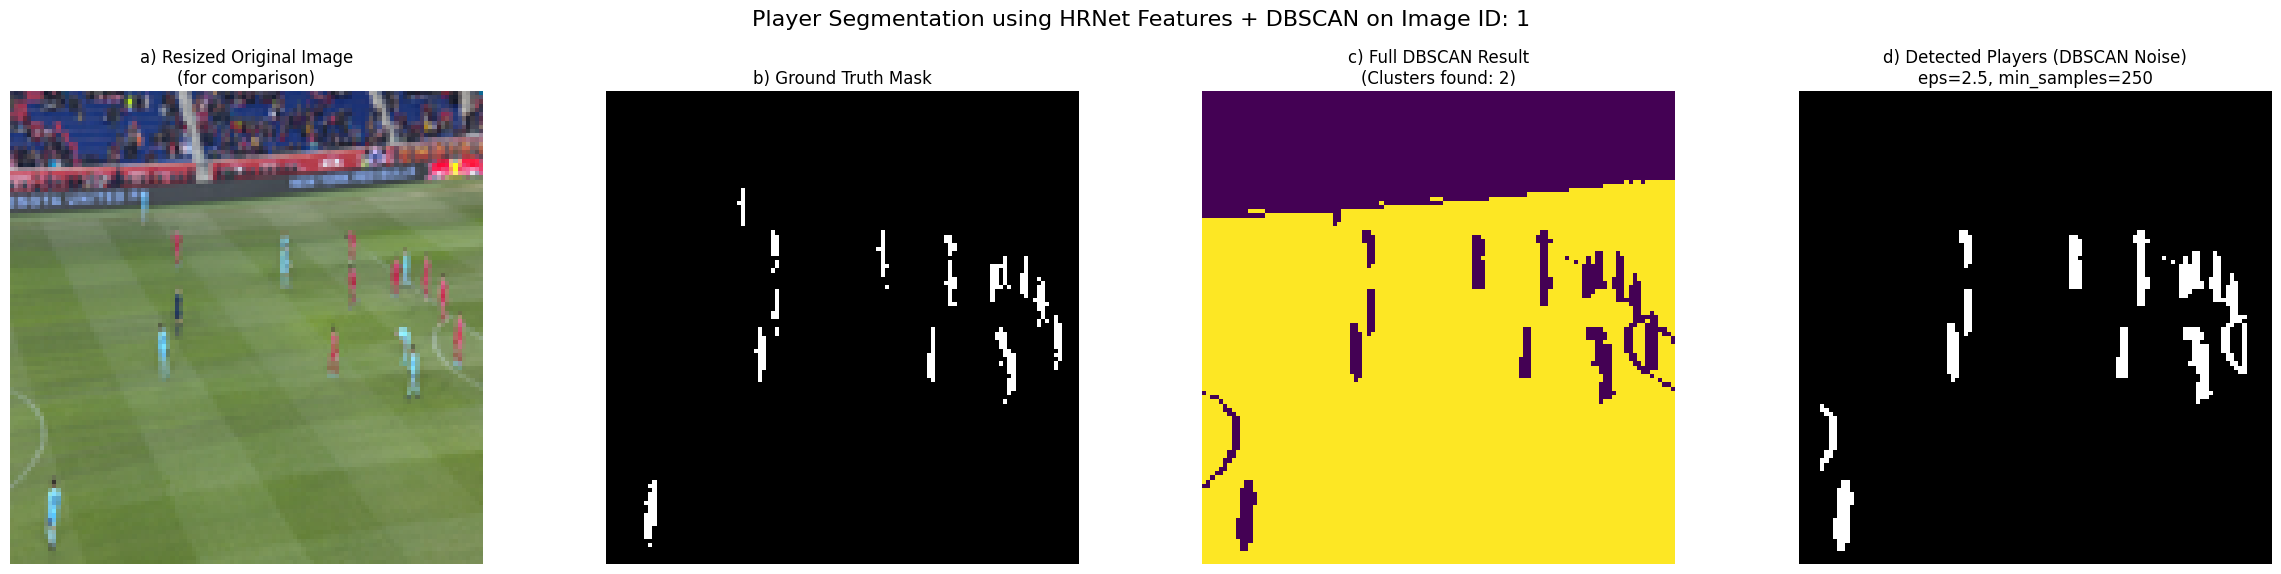

In [ ]:
import torch
import timm
from torchvision import transforms
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

def load_feature_extractor(model_name='hrnet_w18', pretrained=True):
    """
    Loads a pretrained model from timm and sets it to evaluation mode.
    """
    # Use GPU if available
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # Load a pretrained HRNet model. HRNet is great for maintaining high resolution.
    # 'features_only=True' gives us access to intermediate feature maps.
    model = timm.create_model(model_name, pretrained=pretrained, features_only=True)
    model.to(device)
    model.eval() # Set model to evaluation mode
    print(f"Loaded model: {model_name}")
    return model, device

def extract_features(image_path, model, device, feature_level=0):
    """
    Extracts rich feature representations from an image using the provided model.
    """
    # Load and preprocess the image
    image = Image.open(image_path).convert('RGB')

    # Get the model's specific preprocessing configuration
    data_config = model.default_cfg
    preprocess = transforms.Compose([
        transforms.Resize(data_config['input_size'][1:]),
        transforms.ToTensor(),
        transforms.Normalize(mean=data_config['mean'], std=data_config['std'])
    ])
    input_tensor = preprocess(image).unsqueeze(0).to(device) # Add batch dimension

    # Extract features
    with torch.no_grad():
        # HRNet from timm returns a list of feature maps, from high-res to low-res
        feature_maps = model(input_tensor)

    # Select the highest-resolution feature map (usually the first one)
    # This directly addresses the concern about losing detail
    high_res_features = feature_maps[feature_level].squeeze(0).cpu().numpy()

    # The feature map is (Channels, Height, Width)
    print(f"Original Image Size: {image.size}")
    print(f"Feature Map Shape: {high_res_features.shape}")

    # Also return the resized image for visualization
    resized_image = image.resize((high_res_features.shape[2], high_res_features.shape[1]))

    return high_res_features, resized_image

def cluster_features_with_dbscan(features, eps, min_samples):
    """
    Applies DBSCAN to the feature map to cluster pixels.
    """
    # Reshape features for clustering: (C, H, W) -> (H*W, C)
    c, h, w = features.shape
    feature_vectors = features.reshape(c, h * w).T # Transpose to get (H*W, C)

    # DBSCAN's `eps` is sensitive to feature scale. Standardizing is important.
    print("Scaling feature vectors...")
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(feature_vectors)

    print(f"Running DBSCAN with eps={eps} and min_samples={min_samples}...")
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1) # Use all CPU cores
    clusters = dbscan.fit_predict(scaled_features)

    # Reshape cluster labels back to image dimensions (H, W)
    cluster_map = clusters.reshape(h, w)

    print(f"DBSCAN finished. Found clusters: {np.unique(clusters)}")

    return cluster_map

def apply_spatial_constraints(mask, image_shape):
    """Apply football field spatial knowledge"""
    h, w = image_shape[:2]

    # Create field region mask (exclude top 30% where fans typically are)
    field_mask = np.ones((h, w), dtype=bool)
    field_mask[:int(0.3*h), :] = False  # Exclude fan areas

    # Apply side constraints (players rarely at extreme edges)
    field_mask[:, :int(0.05*w)] = False
    field_mask[:, int(0.95*w):] = False

    return mask & field_mask

# Initialize dataset 
print("Initializing Football Segmentation Dataset...")
dataset = FootballSegmentationDataset(path)

# Select a sample image for our experiment
IMAGE_ID_TO_TEST = 1 
img_info = dataset.images_dict[IMAGE_ID_TO_TEST]
img_path = os.path.join(dataset.images_path, img_info['file_name'])

# DBSCAN Parameters - THESE ARE THE KEY PARAMETERS TO TUNE
# `eps`: The maximum distance between two feature vectors for one to be considered
#        in the neighborhood of the other. Lower values mean more clusters.
# `min_samples`: The number of samples in a neighborhood for a point to be
#                considered a core point. A high value helps define large,
#                uniform areas (like the grass field) as a single cluster.
EPS = 2.5
MIN_SAMPLES = 250 # High value to make the background a cluster and players noise

# Load model
model, device = load_feature_extractor()

# Extract features
features, resized_image = extract_features(img_path, model, device)

# Perform clustering
cluster_map = cluster_features_with_dbscan(features, eps=EPS, min_samples=MIN_SAMPLES)

# Create the final player mask (where label is -1)
# we want players to be labeled as noise (-1)
raw_player_mask = (cluster_map == -1).astype(np.uint8)
player_mask = apply_spatial_constraints(raw_player_mask.astype(bool), raw_player_mask.shape).astype(np.uint8)

plt.style.use('default')
fig, axes = plt.subplots(1, 4, figsize=(24, 6))

# a) Original Image
axes[0].imshow(resized_image)
axes[0].set_title(f'a) Resized Original Image\n(for comparison)')
axes[0].axis('off')

# b) Ground Truth Mask (for evaluation)
gt_mask = dataset.create_segmentation_mask(IMAGE_ID_TO_TEST)
if gt_mask is not None:
    # Resize GT mask to match feature map size for fair comparison
    resized_gt_mask = cv2.resize(gt_mask, (features.shape[2], features.shape[1]),
                                    interpolation=cv2.INTER_NEAREST)
    axes[1].imshow(resized_gt_mask, cmap='gray')
    axes[1].set_title('b) Ground Truth Mask')
    axes[1].axis('off')

# c) Full DBSCAN Cluster Map
# We add 1 to the cluster map so that noise (-1) becomes 0 (black) for better visualization
unique_clusters = len(np.unique(cluster_map))
axes[2].imshow(cluster_map + 1, cmap=plt.cm.get_cmap('viridis', unique_clusters))
axes[2].set_title(f'c) Full DBSCAN Result\n(Clusters found: {unique_clusters})')
axes[2].axis('off')

# d) Final Player Mask (Noise points from DBSCAN)
axes[3].imshow(player_mask, cmap='gray')
axes[3].set_title(f'd) Detected Players (DBSCAN Noise)\neps={EPS}, min_samples={MIN_SAMPLES}')
axes[3].axis('off')

plt.suptitle(f"Player Segmentation using HRNet Features + DBSCAN on Image ID: {IMAGE_ID_TO_TEST}", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()